#### Copyright 2019 Google LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Saving and Loading Models

So far we have created models and immediately used them for prediction. This is useful in a classroom setting, but most of the time you will want to save your model and deploy it to some production system. You might also want to use one of the many pre-trained models available online in your own project.
 
In this colab we will save/persist and load models in both scikit-learn and TensorFlow.

## Overview

### Learning Objectives

 * Understand how to save the state of a model.
 * Revivie and use a persisted model.

### Prerequisites

* Intermediate Python
* Linear Regression with scikit-learn
* Linear Regression with TensorFlow

### Estimated Duration

60 minutes

### Grading Criteria

Each exercise is worth 3 points. The rubric for calculating those points is:

| Points | Description |
|--------|-------------|
| 0      | No attempt at exercise |
| 1      | Attempted exercise, but code does not run |
| 2      | Attempted exercise, code runs, but produces incorrect answer |
| 3      | Exercise completed successfully |

There are 2 exercises in this Colab so there are 6 points available. The grading scale will be 6 points.

## scikit-learn

### Build a Model

To begin, we will build a simple linear regression model using scikit-learn.
 
The dataset we are using is one of the toy datasets packaged with scikit-learn, [linnerud](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud). The dataset contains 20 observations of different people's ability to perform chin ups, situps, and jumping jacks along with measurements of their weight, waist, and resting pulse.
 
We'll create a [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model to try to predict pulse.

In [2]:
from sklearn.datasets import load_linnerud
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

bunch = load_linnerud()
df = pd.DataFrame(
    np.c_[(bunch.data, bunch.target)],
    columns=np.concatenate((bunch.feature_names, bunch.target_names))
)

model = LinearRegression()
model.fit(df[["Chins", "Situps", "Jumps"]], df["Pulse"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Save the Model

Now that we have a model built, we want to save the model. This is also known as "persisting" a model. scikit-learn has great [documentation about persisting models](https://scikit-learn.org/stable/modules/model_persistence.html).
 
The tl;dr is that scikit-learn doesn't have any built-in ability to save models so it farms out that work to other tools, such as Python's core [pickle](https://docs.python.org/3/library/pickle.html) module.

In [3]:
import pickle

model_file = 'my_regression.pkl'

with open(model_file, 'wb') as output:
    pickle.dump(model, output, pickle.HIGHEST_PROTOCOL)

After running the code block above, you should be able to click on the file browsing tab in Colab and see a new file called 'my_regression.pkl'.

You have now persisted your model.

### Load the Model

Later, you will want to load your saved model and use it to predict or even train it with additional data. To do this we rely on pickle again.

In [4]:
with open(model_file, 'rb') as input:
    model_restored = pickle.load(input)

model_restored.predict([[45, 34, 2]])

array([53.46188406])

As you can see, we can load our model and use it for prediction.

## TensorFlow

### Using a Pre-Trained Models

Building and training a model from scratch can be a long and painful process. Luckily, there are many publicly available models that are pre-trained and hosted online for you to freely use.
 
Why would you want to use a pre-trained model? Maybe there is already a model that performs some task that you need to perform such as image recognition. Or possibly you want to further build on an existing model utilizing *transfer learning* to adapt the model to your problem.
 
Where do you find these models? There are many places. One of the more common is the official list of pre-trained models curated by the TensorFlow developers. This is often referred to as the [TensorFlow Zoo](https://github.com/tensorflow/models).
 
In this course we will be utilizing models stored in the [Tensorflow detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md). In particular, we'll focus on the [Common Objects in Context (COCO)](http://cocodataset.org/) dataset. The COCO dataset contains over 270,000 labeled images in 91 categories.

#### Obtain the Model File

The first step in using a pre-trained model is to obtain the model file. For this colab we'll visit the [TensorFlow Zoo](https://github.com/tensorflow/models) and download the `ssd_mobilenet_v1_coco` model.

The direct link to the model changes as the model is updated, so you'll need to browse the links in the zoo and find the model. Once you click the download link you'll have a file on your system named similarly to:

 > `ssd_mobilenet_v1_coco_2018_01_28.tar.gz`

This is a compressed version of the model file. It is a gzipped zipped (.gz) tape archive (.tar) file. If you want to explore the file on your local system you might need to install a program such as [7-zip](https://www.7-zip.org/). On Mac and Linux systems you should be able to right-click on the file and extract the contents. If you are comfortable with the command line you can use the following command to extract the file contents.

  > `tar -xzvf ssd_mobilenet_v1_coco_2018_01_28.tar.gz`

And finally, if you just want to directly load the file to this colab, update the file name in the code snippet below and run the code.

In [5]:
import urllib.request
import os

base_url = 'http://download.tensorflow.org/models/object_detection/'
file_name = 'ssd_mobilenet_v1_coco_2018_01_28.tar.gz'

url = base_url + file_name

urllib.request.urlretrieve(url, file_name)

os.listdir()

['WIP Deep Neural Networks in Tensorflow.ipynb',
 'k-Means.ipynb',
 'vecs.tsv',
 'Linear Regression With scikit-learn.ipynb',
 '.DS_Store',
 'Embeddings.ipynb',
 'Text Generation.ipynb',
 'Classification with TensorFlow.ipynb',
 'Cross Validation.ipynb',
 'meta.tsv',
 'Employee_Salaries_-_2017.csv',
 'Regression Quality.ipynb',
 'Saving and Loading Models.ipynb',
 'life_expectancy_years.csv',
 'KNN.ipynb',
 'Video Processing.ipynb',
 'ratings.csv',
 'Classification with scikit-learn.ipynb',
 'Polynomial Regression and Overfitting.ipynb',
 'Sequence Prediction.ipynb',
 'Decision Trees and Random Forests.ipynb',
 'Autoencoders.ipynb',
 'public-flavors_of_cacao.csv',
 'public_movies_metadata.csv',
 'Manipulating an Image in Python.ipynb',
 'bottle.csv',
 'my_regression.pkl',
 'car.jpg',
 'Introduction to Pandas.ipynb',
 'ssd_mobilenet_v1_coco_2018_01_28.tar.gz',
 '.ipynb_checkpoints',
 'Intermediate Pandas.ipynb',
 'diabetes.csv',
 'Probability.ipynb',
 'Image Classification with Keras.ip

#### Extract the Model Data

In order to load the model, it must be extracted from the compressed archive file (also called a "tarball" in this case). To do that we will use Python's tarfile module to extract the contents of the file. The contents of the file will be saved in a directory named after the file. For example, the contents of "ssd_mobilenet_v1_coco_2018_01_28.tar.gz" will be saved in the "ssd_mobilenet_v1_coco_2018_01_28" directory.

In [6]:
import tarfile
import shutil

dir_name = file_name[0:-len('.tar.gz')]

if os.path.exists(dir_name):
  shutil.rmtree(dir_name) 

tarfile.open(file_name, 'r:gz').extractall('./')

os.listdir(dir_name)

['model.ckpt.meta',
 'checkpoint',
 'saved_model',
 'pipeline.config',
 'frozen_inference_graph.pb',
 'model.ckpt.index',
 'model.ckpt.data-00000-of-00001']

#### Load the Frozen Graph

There are some interesting files contained in the archive including checkpoints that can be used for resuming model training from a specific point. In our case we care about the "frozen_inference_graph.pb" file. This contains a trained TensorFlow graph that we can use for classification.

We can load the frozen graph using TensorFlow's `FastGFile` method to open the file and then call `GraphDef.ParseFromString` to load the graph into memory.

In [7]:
import tensorflow as tf

frozen_graph = os.path.join(dir_name, 'frozen_inference_graph.pb')

with tf.gfile.FastGFile(frozen_graph,'rb') as f:
  graph_def = tf.GraphDef()
  graph_def.ParseFromString(f.read())

W0809 19:39:36.045490 4342683072 deprecation.py:323] From <ipython-input-7-712d6bf8371d>:5: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.gfile.GFile.


#### Explore the Graph

Now we have a graph loaded, but how do we use it? What are the inputs? What are the outputs?
 
In a perfect world model builders would fully document the inputs and outputs of their models and we would know exactly how to interact with them. Unfortunately this is rarely the case.
 
If we were working on system with TensorBoard installed we could visualize the graph and find graph nodes that were needed for input and that could be useful for output, but Colab doesn't have that tight of integration with TensorBoard yet.
 
So how do we find the intended inputs and outputs to the graph? We have to do a little sleuthing.
 
The first step is just to determine the number of nodes in the graph.

In [8]:
len(graph_def.node)

5960

In this case we have on the order of 59,605,960. This is probably more than you want to sort through manually.
 
An interesting insight is that TensorFlow automatically names nodes if you don't name them yourself and that nested nodes typically have a slash, '/', in the name.
 
How many nodes do we have without slashes?

In [9]:
len([n for n in graph_def.node if '/' not in n.name])

13

That is a much more approachable number. Let's print out these "edge" nodes and see if we can see any obvious inputs and outputs.

In [10]:
for n in graph_def.node:
  if '/' not in n.name:
    print(n.name)

image_tensor
ToFloat
Shape_6
strided_slice_6
strided_slice_7
concat
Squeeze
concat_1
detection_boxes
detection_scores
num_detections
add
detection_classes


At the time of creating this Colab the list that we got back was:
 
 * image_tensor
 * ToFloat
 * Shape_6
 * strided_slice_6
 * strided_slice_7
 * concat
 * Squeeze
 * concat_1
 * detection_boxes
 * detection_scores
 * num_detections
 * add
 * detection_classes
 
Many of these look like a computer generated them or like it wouldn't really matter if you knew the value of them or not. The standouts seem to be:
 
 * image_tensor
 * detection_boxes
 * detection_scores
 * num_detections
 * detection_classes
 
Where 'image_tensor' looks a lot like input and the '*detection*' classes look like output from a classification.

Let's take a look at the details of the 'image_tensor'.

In [11]:
for n in graph_def.node:
  if n.name == 'image_tensor':
    print(n)

name: "image_tensor"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_UINT8
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: -1
      }
      dim {
        size: -1
      }
      dim {
        size: -1
      }
      dim {
        size: 3
      }
    }
  }
}



The 'Placeholder' looks significant. Actually, thinking back to our "Introduction to TensorFlow" Colab we can remember that placeholders are the entrypoint for input data into the graph.
 
Let's see how many placeholders we have in this graph.

In [12]:
for n in graph_def.node:
  if n.op == 'Placeholder':
    print(n.name)

image_tensor


One and only one, our 'image_tensor'.

And what size input does the input tensor take?

Look back a few cells and you'll see that it expects input of shape (-1, -1, -1, 3). The -1 values just indicate that the tensor accepts variable sized input, but the 3 is telling. RGB values are three values containing colors of an image. This tensor is likely wanting a variable number of images with a variable width and height, but with three color values.

Now let's look at our '*detection*' nodes.

In [13]:
for n in graph_def.node:
  if 'detection' in n.name and '/' not in n.name:
    print(n)

name: "detection_boxes"
op: "Identity"
input: "Postprocessor/BatchMultiClassNonMaxSuppression/map/TensorArrayStack/TensorArrayGatherV3"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}

name: "detection_scores"
op: "Identity"
input: "Postprocessor/BatchMultiClassNonMaxSuppression/map/TensorArrayStack_1/TensorArrayGatherV3"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}

name: "num_detections"
op: "Identity"
input: "Postprocessor/ToFloat_3"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}

name: "detection_classes"
op: "Identity"
input: "add"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}



This information isn't quite satisfying. We can see that each node receives a float value, but we aren't sure what shape of data we'll be getting back.
 
However, we now know the data that we need to input into the graph and the data that we can extract from the graph. We can run the graph and manually explore the outputs to determine what data and shape they conform to.

#### Run the Graph

Now that we have a graph loaded, we need to test it out. Let's download an [image of a car](https://pixabay.com/illustrations/car-sports-car-racing-car-speed-49278/) and upload that image to this Colab. Rename the file 'car.jpg' or change the name of the `image_filename` variable below to match the name of the file you uploaded.

In [14]:
image_filename = 'car.jpg'

Now we can review the car image.

In [15]:
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread('car.jpg')

plt.imshow(image)
plt.show()

<Figure size 640x480 with 1 Axes>

It is almost time to run the graph. Remember that TensorFlow allows you to request execution to any node in the graph. We want to know all of the '*detection*' outputs that we discovered in the graph. These were:

  * num_detections
  * detection_scores
  * detection_boxes
  * detection_classes

We will build a list of *outputs* that we want TensorFlow to generate.

In [16]:
outputs = (
    'num_detections',
    'detection_classes',
    'detection_scores',
    'detection_boxes',
)

We also need to input data into the graph. Our expected input shape is (-1, -1, -1, 3). Let's see the shape of our input image.

In [17]:
image.shape

(256, 455, 3)

(360, 640, 3) is a 3-dimensional shape while our model is expecting a 4-dimensional input. This is because it can take multiple inputs.

Since we are testing with only one image we just need to wrap that image in a list.

In [18]:
input_images = [image]

We can now execute the graph requesting our outputs and providing inputs.

In [19]:
with tf.Session() as sess:
  sess.graph.as_default()
  tf.import_graph_def(graph_def,name='')

  detections = sess.run(
      [sess.graph.get_tensor_by_name(f'{op}:0') for op in outputs],
      feed_dict={ 'image_tensor:0': input_images }
  )

#### Investigate Outputs

We have now fed our image into the graph. It is time to explore the outputs of that graph.

When the graph executed, it stores all outputs in a variable called `detections`. Let's first look at that variable and see what type it is.

In [20]:
type(detections)

list

A 'list'. How many elements?

In [21]:
len(detections)

4

Four. That is suspiciously similar to the number of outputs we asked for. Remember that we requested:

  1. num_detections
  1. detection_classes
  1. detection_scores
  1. detection_boxes

Let's see if our first row looks like the number of detections that were found. 

In [22]:
detections[0]

array([1.], dtype=float32)

A list with a single value of 1. This makes sense because we sent the classifier 1 image of a car and only a car.
 
Let's move to the next list item.

In [23]:
detections[1]

array([[3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]], dtype=float32)

Interesting. We get a list of list where all of the values of the sub-list are 1 except for the first value.
 
The second output we requested was 'classes'. This is likely the index of the class of the detection.

And the next element?

In [24]:
detections[2]

array([[0.9116559, 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.      

Scores were expected and indeed scores seem to be what was received.

Now for the final element?

In [25]:
detections[3]

array([[[0.32248515, 0.16789174, 0.81272894, 0.90980875],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.   

Four-element lists. These look a lot like bounding boxes.

We inspected our model and found that it accepts a list of variable sized images and that it returns information such as the number of matches, the class, the confidence, and the bounding boxes for each object found in an image.

#### Mapping Numbers to Labels

We now have enough information to know how to find, load, and use a pre-trained classification model. But how do we know what the discovered classes actually mean?
 
Typically in machine learning models a class is represented as a number. We have to work outside of the model to turn that number back into a label that makes sense to a human.
 
Typically this takes a bit of searching. In the case of the model we just used you can find the label-to-number mapping in a [textual protocol buffer file](https://github.com/tensorflow/models/blob/master/research/object_detection/data/mscoco_complete_label_map.pbtxt) on GitHub.
 
It is the responsibility of the model user to find the number-to-text mappings and apply those to the model output. In this case we can see that classification 3 is a car.

# Exercises

## Exercise 1: scikit-learn Pickling

In this exercise you will build an [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) using the [linnerud](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud) dataset and train that regressor to predict 'Pulse'.

Create the regressor and then pickle it into a file called 'sgd_reg_linnerud.pkl'.

### Student Solution

In [26]:
# Your code goes here
from sklearn.datasets import load_linnerud
from sklearn.linear_model import SGDRegressor

import pandas as pd
import numpy as np
import pickle

bunch = load_linnerud()
df = pd.DataFrame(
    np.c_[(bunch.data, bunch.target)],
    columns=np.concatenate((bunch.feature_names, bunch.target_names))
)
# df.columns

model = SGDRegressor()
model.fit(df[["Chins", "Situps", "Jumps"]], df["Pulse"])



model_file = 'sgd_reg_linnerud.pkl'

with open(model_file, 'wb') as output:
    pickle.dump(model, output, pickle.HIGHEST_PROTOCOL)

## Exercise 2: Using a Pre-Trained TensorFlow Model

In this exercise load the COCO dataset used above into a graph. Then using [this photo from Pixabay](https://pixabay.com/photos/pets-cute-cat-dog-cute-wallpaper-3715733/), download the photo and draw a green box around every dog and a blue box around every cat.

Save the modified image as 'dogs-and-cats.jpg'.

### Student Solution

In [27]:
# Your code goes here
import urllib.request
import os
import tarfile
import shutil
import tensorflow as tf

base_url = 'http://download.tensorflow.org/models/object_detection/'
file_name = 'ssd_mobilenet_v1_coco_2018_01_28.tar.gz'

url = base_url + file_name
urllib.request.urlretrieve(url, file_name)
os.listdir()

dir_name = file_name[0:-len('.tar.gz')]
if os.path.exists(dir_name):
  shutil.rmtree(dir_name) 

tarfile.open(file_name, 'r:gz').extractall('./')
os.listdir(dir_name)

frozen_graph = os.path.join(dir_name, 'frozen_inference_graph.pb')

with tf.gfile.FastGFile(frozen_graph,'rb') as f:
  graph_def = tf.GraphDef()
  graph_def.ParseFromString(f.read())


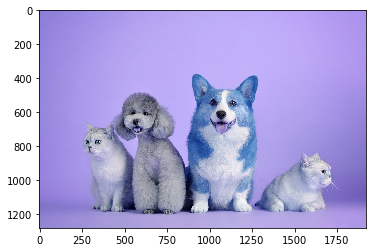

In [29]:
image_filename = 'pets.jpg'
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread('pets.jpg')
plt.imshow(image)
plt.show()

In [30]:
outputs = (
    'num_detections',
    'detection_classes',
    'detection_scores',
    'detection_boxes',
)

In [31]:
input_images = [image]

In [32]:
with tf.Session() as sess:
  sess.graph.as_default()
  tf.import_graph_def(graph_def,name='')

  detections = sess.run(
      [sess.graph.get_tensor_by_name(f'{op}:0') for op in outputs],
      feed_dict={ 'image_tensor:0': input_images }
  )

In [33]:
detections

[array([4.], dtype=float32),
 array([[88., 88., 18., 17.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]], dtype=float32),
 array([[0.9440328 , 0.7069737 , 0.40732756, 0.34047818, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0. 

In [34]:
detections[1]

array([[88., 88., 18., 17.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]], dtype=float32)

In [35]:
detections[3][0][0]

array([0.38176334, 0.20377669, 0.9498038 , 0.45591554], dtype=float32)

In [36]:
image.shape

(1279, 1920, 3)

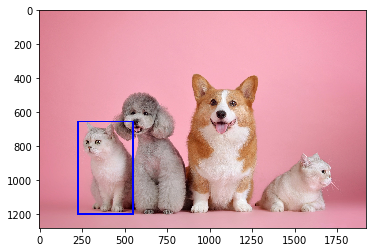

In [37]:
left = int(image.shape[1]*detections[3][0][1][1]-50)
right = int(image.shape[1]*detections[3][0][1][3]-200)
top = int(image.shape[0]*detections[3][0][1][0]+110)
bottom = int(image.shape[0]*detections[3][0][1][2])

r = 0
g = 0
b = 255
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv.rectangle(image, (left, top), (right, bottom), (r, g, b), thickness=8)
plt.imshow(image)
plt.show()

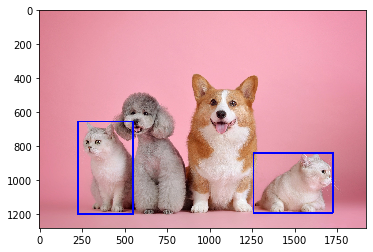

In [38]:
left = int(image.shape[1]*detections[3][0][3][1])
right = int(image.shape[1]*detections[3][0][3][3])
top = int(image.shape[0]*detections[3][0][3][0])
bottom = int(image.shape[0]*detections[3][0][3][2])

r = 0
g = 0
b = 255
cv.rectangle(image, (left, top), (right, bottom), (r, g, b), thickness=8)
plt.imshow(image)
plt.show()

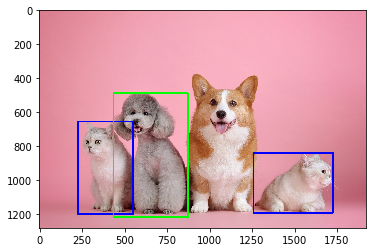

In [39]:
left = int(image.shape[1]*detections[3][0][0][1]+45)
right = int(image.shape[1]*detections[3][0][0][3])
top = int(image.shape[0]*detections[3][0][0][0])
bottom = int(image.shape[0]*detections[3][0][0][2])

r = 0
g = 255
b = 0
cv.rectangle(image, (left, top), (right, bottom), (r, g, b), thickness=8)
plt.imshow(image)
plt.show()

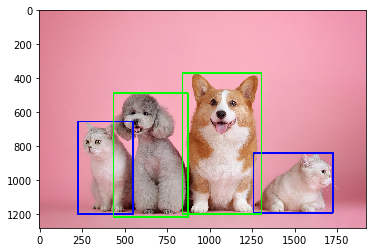

In [40]:
left = int(image.shape[1]*detections[3][0][2][1])
right = int(image.shape[1]*detections[3][0][2][3])
top = int(image.shape[0]*detections[3][0][2][0])
bottom = int(image.shape[0]*detections[3][0][2][2]+30)

r = 0
g = 255
b = 0
cv.rectangle(image, (left, top), (right, bottom), (r, g, b), thickness=8)
plt.imshow(image)
plt.show()

In [41]:
cv.imwrite("dogs-and-cats.jpg", cv.cvtColor(image, cv.COLOR_RGB2BGR))

True

In [43]:
image_filename = 'hedgehog.jpg'
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread('hedgehog.jpg')
# plt.imshow(image)
# plt.show()

input_images = [image]
with tf.Session() as sess:
  sess.graph.as_default()
  tf.import_graph_def(graph_def,name='')

  detections = sess.run(
      [sess.graph.get_tensor_by_name(f'{op}:0') for op in outputs],
      feed_dict={ 'image_tensor:0': input_images }
  )

In [44]:
detections

[array([1.], dtype=float32),
 array([[16.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]], dtype=float32),
 array([[0.3765995, 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
      

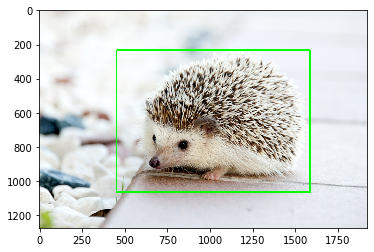

In [45]:
left = int(image.shape[1]*detections[3][0][0][1]+300)
right = int(image.shape[1]*detections[3][0][0][3]-250)
top = int(image.shape[0]*detections[3][0][0][0])
bottom = int(image.shape[0]*detections[3][0][0][2]-200)

r = 0
g = 255
b = 0
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv.rectangle(image, (left, top), (right, bottom), (r, g, b), thickness=8)
plt.imshow(image)
plt.show()